In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

In [2]:
yokohama_amd = pd.read_csv("../../../../../../media/kitawaki/601C4C0D1C4BDD22/気象データ/amd3/amd_46106.tsv", delimiter='\t')

In [3]:
print(len(yokohama_amd.index))
yokohama_amd.isnull().sum()

276048


datetime         0
pr               0
f_pr             0
max_ws          36
f_max_ws         0
ave_wv          35
f_ave_wv         0
ave_ws          35
f_ave_ws         0
max_tp          89
f_max_tp         0
min_tp          89
f_min_tp         0
sl              27
f_sl             0
sd          142507
f_sd             0
dsd         142545
f_dsd            0
dtype: int64

In [4]:
ebina_amd = pd.read_csv("../../../../../../media/kitawaki/601C4C0D1C4BDD22/気象データ/amd3/amd_46091.tsv", delimiter='\t')

In [5]:
print(len(ebina_amd.index))
ebina_amd.isnull().sum()

276048


datetime         0
pr              35
f_pr             9
max_ws          65
f_max_ws         9
ave_wv          64
f_ave_wv         9
ave_ws          65
f_ave_ws         9
max_tp          70
f_max_tp         9
min_tp          70
f_min_tp         9
sl              51
f_sl             9
sd          276026
f_sd             9
dsd         276035
f_dsd            9
dtype: int64

In [6]:
yokohama_amd = yokohama_amd.fillna(ebina_amd)

In [7]:
yokohama_amd.isnull().sum()

datetime         0
pr               0
f_pr             0
max_ws           0
f_max_ws         0
ave_wv           0
f_ave_wv         0
ave_ws           0
f_ave_ws         0
max_tp           0
f_max_tp         0
min_tp           0
f_min_tp         0
sl               0
f_sl             0
sd          142485
f_sd             0
dsd         142532
f_dsd            0
dtype: int64

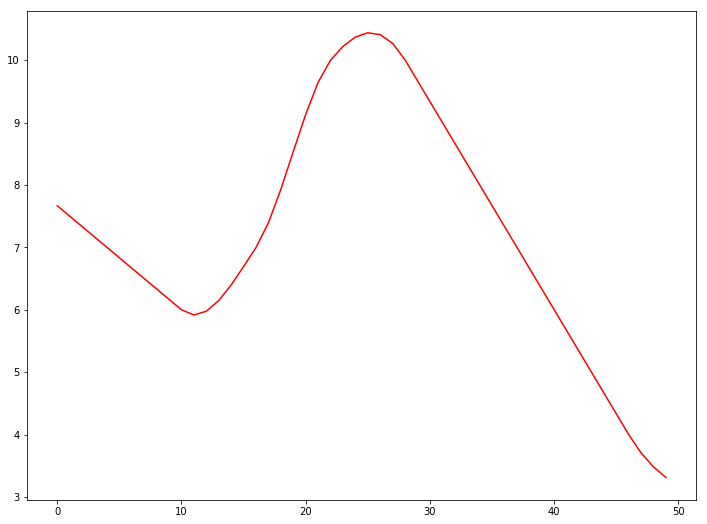

In [10]:
forecast_kanagawa = pd.read_csv("../../../../../../media/kitawaki/601C4C0D1C4BDD22/気象データ/forecast/forecast_kanagawa.tsv", delimiter='\t')
forecast_kanagawa = forecast_kanagawa.drop('weather', axis = 1)
forecast_kanagawa = forecast_kanagawa.drop('weather_detail', axis = 1)
forecast_kanagawa = forecast_kanagawa.drop('wind', axis = 1)

forecast_kanagawa = forecast_kanagawa.drop('wv_00-03', axis = 1)
forecast_kanagawa = forecast_kanagawa.drop('wv_03-06', axis = 1)
forecast_kanagawa = forecast_kanagawa.drop('wv_06-09', axis = 1)
forecast_kanagawa = forecast_kanagawa.drop('wv_09-12', axis = 1)
forecast_kanagawa = forecast_kanagawa.drop('wv_12-15', axis = 1)
forecast_kanagawa = forecast_kanagawa.drop('wv_15-18', axis = 1)
forecast_kanagawa = forecast_kanagawa.drop('wv_18-21', axis = 1)
forecast_kanagawa = forecast_kanagawa.drop('wv_21-24', axis = 1)
ka_tp = forecast_kanagawa.loc[:, forecast_kanagawa.columns.str.startswith("tp_")]

from scipy import signal, interpolate
ka_tp = ka_tp.values.flatten()
t = np.linspace(0, len(ka_tp), len(ka_tp))
tt = np.linspace(0, len(ka_tp), (len(ka_tp)) * 6)

# 線形補間
f1 = interpolate.Akima1DInterpolator(t,ka_tp)
ka_tp_forecast = f1(tt)
ka_tp_forecast[:10]
plt.figure(figsize=(12, 9))
#plt.plot(t[50:100], ka_tp[50:100], "o")
plt.plot(ka_tp_forecast[50:100], "r", label="linear")
#plt.plot(train_1month_SOLA01[50:100])
plt.show()

In [11]:
ka_we = forecast_kanagawa.loc[:, forecast_kanagawa.columns.str.startswith("we_")]
ka_we = ka_we.values.flatten()
ka_weather = np.repeat(ka_we, 6)
ya_X = pd.get_dummies(ka_weather, drop_first = True)
ka_tp = pd.DataFrame(ka_tp_forecast)
print(len(ya_X.index))
print(len(ka_tp.index))
ya_train_data = pd.concat([ka_tp, ya_X], axis=1)
ya_train_data.head()

92016
92016


,0,晴れ,雨,雪
0,5.000000,0,0,0
1,4.767759,0,0,0
2,4.567921,0,0,0
3,4.395859,0,0,0
4,4.246944,0,0,0


In [12]:
ya_train_data = ya_train_data.rename(columns = {0:'気温'})
ya_train_data.head()

,気温,晴れ,雨,雪
0,5.000000,0,0,0
1,4.767759,0,0,0
2,4.567921,0,0,0
3,4.395859,0,0,0
4,4.246944,0,0,0


In [13]:
train_rng_2 = pd.date_range("201201010000", "201703312330", freq="30T") # 学習期間：30分間隔
ya_train_data.index = train_rng_2
ya_train_data.head()

,気温,晴れ,雨,雪
2012-01-01 00:00:00,5.000000,0,0,0
2012-01-01 00:30:00,4.767759,0,0,0
2012-01-01 01:00:00,4.567921,0,0,0
2012-01-01 01:30:00,4.395859,0,0,0
2012-01-01 02:00:00,4.246944,0,0,0


In [8]:
#ka_train_data = pd.concat([ya_train_data, yokohama_amd['sl']], axis=1)
train_rng = pd.date_range("201201010000", "201703312350", freq="10T") # 学習期間：30分間隔
yokohama_amd.index = train_rng

In [9]:
ya_t = yokohama_amd.groupby(pd.Grouper(freq="30T")).sum()

In [10]:
ya_t = yokohama_amd.groupby(pd.Grouper(freq="30T")).sum()
ka_train_data = pd.concat([ya_train_data[:'2015-12-31 11:30:00']\
                           , ya_t['sl']], axis=1)

NameError: name 'ya_train_data' is not defined

In [11]:
train_ka_sl = ya_t['sl']

In [12]:
kanagawa_sl = train_ka_sl[:'2014-12-31 23:30:00']

In [16]:
train_ka_sl = ya_t['sl']['2012-01']
train_ka_sl  = train_ka_sl.as_matrix()
data = np.reshape(train_ka_sl, (31, 48))

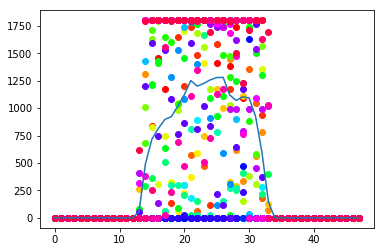

In [17]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

for i in range(0,31):
    plt.plot(data[i], 'o',color=cm.hsv(i/31))
plt.plot(np.mean(data, axis=0))
plt.show()

In [18]:
date_time = []

In [65]:
hours = [x.hour for x in train_rng_2]
months = [x.month for x in train_rng_2]
ka_sl = ya_t['sl']['2012-01']
ka_data = []
for i in range(0, len(ka_sl)):
    if (hours[i] >= 7 and months[i] == 1) and (hours[i] <= 17 and month9942.191s[i] == 1): 
        date_time.append(train_rng_2[i])
        ka_data.append(ka_sl[i])

In [61]:
import statsmodels.api as sm
res = sm.tsa.arma_order_select_ic(ka_data, ic='aic', trend='nc')
print(res)

/home/kitawaki/anaconda3/envs/tensorflow/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


{'aic':               0             1             2
0           NaN  10985.176912  10678.811622
1  10271.752628  10267.486495  10268.853666
2  10267.941257  10268.951388  10236.955944
3  10268.822019  10235.567634  10260.007630
4  10270.508160  10271.127302  10238.151147, 'aic_min_order': (3, 1)}


In [59]:
stats.boxcox(kanagawa_sl[18:25])

/home/kitawaki/anaconda3/envs/tensorflow/lib/python3.5/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/home/kitawaki/anaconda3/envs/tensorflow/lib/python3.5/site-packages/scipy/optimize/optimize.py:2189: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/home/kitawaki/anaconda3/envs/tensorflow/lib/python3.5/site-packages/scipy/optimize/optimize.py:1849: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/home/kitawaki/anaconda3/envs/tensorflow/lib/python3.5/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


(array([  7.38236245e+30,   7.38236245e+30,   7.38236245e+30,
          7.38236245e+30,   7.38236245e+30,   7.38236245e+30,
          7.38236245e+30]), 9.786842082938978)

In [60]:
kanagawa_sl_nor = (kanagawa_sl - kanagawa_sl.min()) / (kanagawa_sl.max() - kanagawa_sl.min())
kanagawa_sl_nor

2012-01-01 00:00:00    0.000000
2012-01-01 00:30:00    0.000000
2012-01-01 01:00:00    0.000000
2012-01-01 01:30:00    0.000000
2012-01-01 02:00:00    0.000000
2012-01-01 02:30:00    0.000000
2012-01-01 03:00:00    0.000000
2012-01-01 03:30:00    0.000000
2012-01-01 04:00:00    0.000000
2012-01-01 04:30:00    0.000000
2012-01-01 05:00:00    0.000000
2012-01-01 05:30:00    0.000000
2012-01-01 06:00:00    0.000000
2012-01-01 06:30:00    0.000000
2012-01-01 07:00:00    0.000000
2012-01-01 07:30:00    0.466667
2012-01-01 08:00:00    0.811111
2012-01-01 08:30:00    0.650000
2012-01-01 09:00:00    1.000000
2012-01-01 09:30:00    1.000000
2012-01-01 10:00:00    1.000000
2012-01-01 10:30:00    1.000000
2012-01-01 11:00:00    1.000000
2012-01-01 11:30:00    1.000000
2012-01-01 12:00:00    1.000000
2012-01-01 12:30:00    0.783333
2012-01-01 13:00:00    0.966667
2012-01-01 13:30:00    0.766667
2012-01-01 14:00:00    0.966667
2012-01-01 14:30:00    0.605556
                         ...   
2014-12-

In [12]:
# 総当たりで、AICが最小となるSARIMAの次数を探す
max_p = 3
max_q = 3
max_d = 1
max_sp = 1
max_sq = 1
max_sd = 1

pattern = max_p*(max_q + 1)*(max_d + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)

modelSelection = pd.DataFrame(index=range(pattern), columns=["model", "aic"])
pattern

192

In [ ]:
import statsmodels.api as sm
# 自動SARIMA選択
num = 0

for p in range(1, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            kanagawa_sl, order=(p,d,q), 
                            seasonal_order=(sp,sd,sq,12), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit()
                        modelSelection.ix[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        modelSelection.ix[num]["aic"] = sarima.aic
                        print(modelSelection.ix[num]["aic"])
                        num = num + 1

749663.87957
749505.859077
785368.895852


In [76]:
modelSelection

,model,aic
0,"order=(1,0,0), season=(0,0,0)",9959.2
1,"order=(1,0,0), season=(0,0,1)",9781.33
2,"order=(1,0,0), season=(0,0,2)",9606.44
3,"order=(1,0,0), season=(0,0,3)",9401.27
4,"order=(1,0,0), season=(0,1,0)",10228
5,"order=(1,0,0), season=(0,1,1)",9612.41
6,"order=(1,0,0), season=(0,1,2)",9421.73
7,"order=(1,0,0), season=(0,1,3)",9248.88
8,"order=(1,0,0), season=(0,2,0)",10753.9
9,"order=(1,0,0), season=(0,2,1)",9886.44


In [77]:
# AIC最小モデル
modelSelection[modelSelection.aic == min(modelSelection.aic)]

,model,aic
203,"order=(1,0,3), season=(0,2,3)",9103.4


In [67]:
from statsmodels.tsa import arima_model
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

SARIMA_3_1_2_111 = sm.tsa.SARIMAX(kanagawa_sl_nor[:len(kanagawa_sl_nor) - 20], order=(1,0,3), seasonal_order=(1,1,1,12), enforce_stationarity = False, enforce_invertibility = False).fit()
print(SARIMA_3_1_2_111.summary())

MemoryError: 

In [80]:
plt.clf
resid = SARIMA_3_1_2_111.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

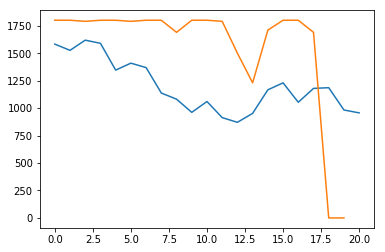

In [87]:
plt.plot(SARIMA_3_1_2_111.predict(start=len(ka_data) - 20,end=len(ka_data)))
plt.plot(ka_data[len(ka_data) - 20:len(ka_data)])
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
results_season = ARIMA(ka_data[:len(ka_data) - 20], order=(3,1,2)).fit(dist = False)
results_season.params

In [ ]:
resid = results_season.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [ ]:
plt.plot(results_season.predict(start=len(ka_data) - 200,end=len(ka_data)))
plt.plot(ka_data[len(ka_data) - 200:len(ka_data)])
plt.show()